In [94]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset (red wine)
wine_quality = fetch_ucirepo(id=186)

# set up data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets
data = pd.concat([X, y], axis = 1)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


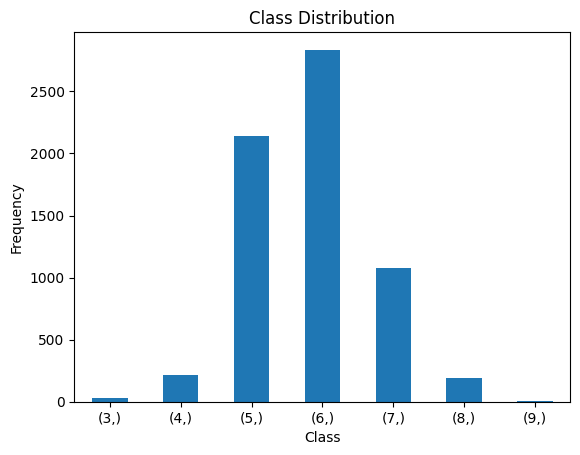

In [95]:
import matplotlib.pyplot as plt

# Step 1

# preview of data
print(X.head())

# plot class distribution

y.value_counts(sort = False).sort_index().plot(kind = 'bar')  # plots a bar chart with classes inorder
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

# Step 2

# split into training and testing sets, in this case 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [97]:
from sklearn.tree import DecisionTreeClassifier

# Step 3

# decision tree classifier
decition_tree_classifier = DecisionTreeClassifier(random_state=42)

# fit the model to training data
decition_tree_classifier.fit(X_train, y_train)

# check size and distribution of sets
print(f"Training size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

print("Class distribution in training:\n", y_train.value_counts(normalize = True))
print("Class distribution in test:\n", y_test.value_counts(normalize = True))

Training size: (5197, 11)
Test size: (1300, 11)
Class distribution in training:
 quality
6          0.436598
5          0.329036
7          0.166057
4          0.033288
8          0.029632
3          0.004618
9          0.000770
Name: proportion, dtype: float64
Class distribution in test:
 quality
6          0.436154
5          0.329231
7          0.166154
4          0.033077
8          0.030000
3          0.004615
9          0.000769
Name: proportion, dtype: float64


In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 4

# create predictions on test set
y_pred = decition_tree_classifier.predict(X_test)

# evaluate classifier
print(classification_report(y_test, y_pred, zero_division = 0))
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.15      0.14      0.15        43
           5       0.67      0.65      0.66       428
           6       0.65      0.63      0.64       567
           7       0.49      0.56      0.52       216
           8       0.33      0.36      0.35        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.33      0.33      0.33      1300
weighted avg       0.60      0.60      0.60      1300

Accuracy score: 0.5985
Confusion matrix:
[[  0   0   4   2   0   0   0]
 [  0   6  18  14   5   0   0]
 [  4  20 279  98  23   4   0]
 [  1  12  98 358  83  15   0]
 [  0   1  17  68 121   9   0]
 [  0   0   0  12  13  14   0]
 [  0   0   0   0   1   0   0]]


In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Step 5

# cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# compute accuracy of cross-validation
cv_scores = cross_val_score(decition_tree_classifier, X, y, cv=cv, scoring='accuracy')

print(f"Cross-Validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")


Cross-Validation accuracy: 0.605 (+/- 0.016)
